In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyfits

### This dataset relies on GalaxyZoo - a citizen science effort to visually clasifiy the morphology of 900,000 galaxies in the Universe.   See Schawinski et al. (2010) for more information about this dataset in particular.

### The data are located at http://data.galaxyzoo.org/. Specifially, this is the AGN Host Galaxies download about halfway down the page.

### Astronomers use FITS formated tabels and images. For a quick reference tutorial on how to open/edit/view these types of files see https://pythonhosted.org/pyfits/users_guide/users_tutorial.html

In [14]:
#Open FITS table
#Get data 
#Get list of columns

In [3]:
#What are the types of classifications?

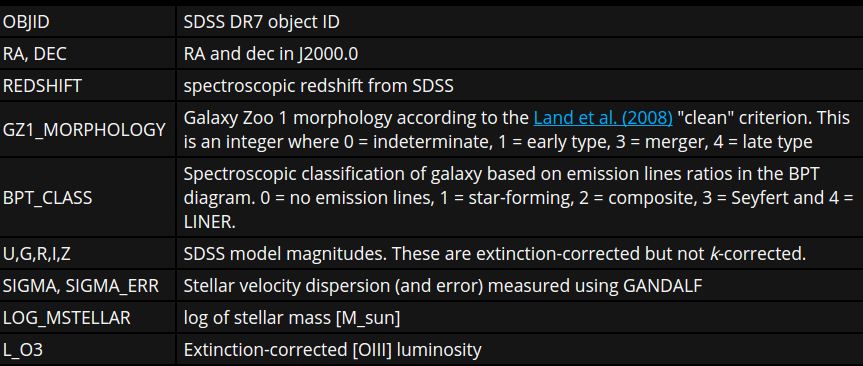

In [357]:
# Numerical information isn't the most enlightening and there's no README.
# Always refer to the data source! data.galaxyzoo.org and Lintott et al. 2008, MNRAS, 389, 1179

from IPython.display import Image

Image(filename='agn_host.png')

In [4]:
#Get some more basic info on the data set

In [17]:
#Set up some conditionals

### PART 1: First thing, let's look at the break down of the stellar mass of galaxies by galaxy type

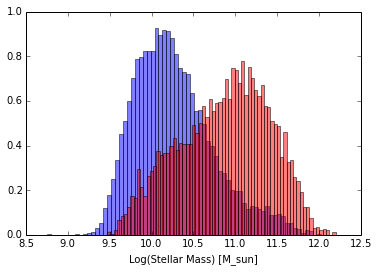

In [338]:
plt.xlabel('Log(Stellar Mass) [M_sun]')
n, bins, patches=plt.hist(tbdata['LOG_MSTELLAR'][spirals],bins=70,normed=True,color='blue',alpha=0.5)
n, bins, patches=plt.hist(tbdata['LOG_MSTELLAR'][ellipticals],bins=70,normed=True,color='red',alpha=0.5)


### Specifically, let's look at the stellar mass distribution of elliptical galaxies and quantify it by fitting a gaussian to the distribution.

In [24]:
#HINT: See http://stackoverflow.com/questions/11507028/fit-a-gaussian-function

Fitted mean =  10.9242100258
Fitted standard deviation =  0.602304276492


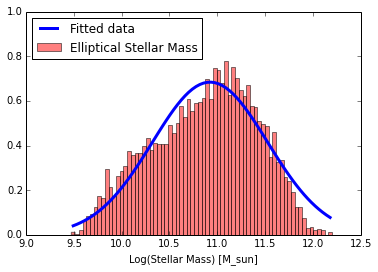

In [25]:
mass=np.asarray(tbdata['LOG_MSTELLAR'][ellipticals])

hist, bin_edges = np.histogram(mass, bins=70,density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 11., .5]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

#plt.plot(bin_centres, hist, label='Test data')
plt.ylim(0,1.0)
plt.xlabel('Log(Stellar Mass) [M_sun]')
n, bins, patches=plt.hist(tbdata['LOG_MSTELLAR'][ellipticals],\
                          bins=70,normed=True,color='red',alpha=0.5,label='Elliptical Stellar Mass')
plt.plot(bin_centres, hist_fit, label='Fitted data',lw=3)
plt.legend(loc='upper left')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

### By eye it looks like there are two different distribution hidding in this sample, with a peak perhaps at 10.3 and 11.0... Let's try and fit two gaussians to this distribution 

Best fit peaks:  [ 10.3074222] [ 11.16534218]


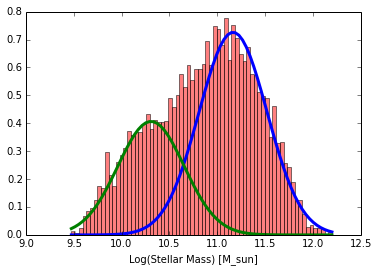

In [45]:
from sklearn import mixture
import matplotlib.pyplot
import matplotlib.mlab

#See http://stackoverflow.com/questions/10143905/python-two-curve-gaussian-fitting-with-non-linear-least-squares

mass=np.asarray(tbdata['LOG_MSTELLAR'][ellipticals])
clf = mixture.GMM(n_components=2, covariance_type='full')
clf.fit(mass)
m1, m2 = clf.means_
w1, w2 = clf.weights_
c1, c2 = clf.covars_
histdist = plt.hist(mass, 70, normed=True,alpha=0.5,color='red')
plt.xlabel('Log(Stellar Mass) [M_sun]')
plotgauss1 = lambda x: plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)

plotgauss1(histdist[1])
plotgauss2(histdist[1])

print('Best fit peaks: ',m2, m1)


### PART 2: Now let's look at how the stellar mass changes with the measured velocity dispersion of a galaxy.

In [19]:
mass=tbdata['LOG_MSTELLAR'][ellipticals]
sigma=tbdata['SIGMA'][ellipticals]
#Plot it


In [11]:
#There seems to be some aliasing, probably for flagged values. Find it, and exclude it.

### Now, bin the data in stellar mass and find the median sigma in each bin with corresponding error bars.

In [20]:
import pandas as pd
#See http://stackoverflow.com/questions/23217851/running-median-of-y-values-over-a-range-of-x

#we build a dataframe from the data
#but first we have to switch between big/little endian 
newmass=mass.byteswap().newbyteorder()
newsigma=sigma.byteswap().newbyteorder()

df = pd.DataFrame({'mass' : newmass, 'sigma' : newsigma})  
nbins=20
bins = np.linspace(mass.min(),mass.max(), nbins)
#we cut the data following the bins
data_cut = pd.cut(df.mass,bins)        
#we group the data by the cut
grp = df.groupby(by = data_cut)        

#we produce an aggregate representation (median) of each bin
df_mean = grp.aggregate(np.mean)
df_std= grp.aggregate(np.std)



In [13]:
#Plot it!

# PART 3: Now, let's look at how different types of galaxies are distributed in color-mass space. Just for background, galaxy color is the difference in brightness of that galaxy in two different filters. In this case, we're using the 'U' and 'R' filters so the color is U-R.

### We'll also look at where AGN (active galactic nuclei -- galaxies with active black holes) tend to reside in this space.

In [21]:
#Color of a galay - higher numbers mean they are REDDER
uminr=np.squeeze(tbdata['U']-tbdata['R'])

#The stellar mass, derived from spectral energy distribution modeling
mass=np.squeeze(tbdata['log_mstellar'])

#Spectral class - uses the shape and type of observed emission lines in each galaxy spectrum to identify which have AGN
bpt_class=np.squeeze(tbdata['bpt_class'])

#Luminosity of [OIII] for each galaxy
lo3=np.squeeze(tbdata['L_O3'])

#Morphology - determined by GalaxyZoo - citizen science
morph=np.squeeze(tbdata['GZ1_MORPHOLOGY'])

#Magnitude (brightness) of each galaxy in Z-band
z=tbdata['Z']

### We'll make a contour plot of U-R (color) vs. stellar mass

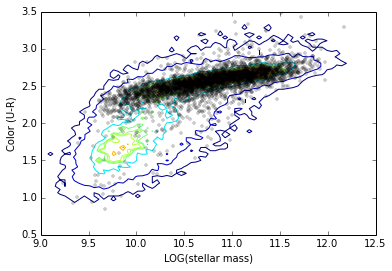

In [23]:
#All galaxies
plt.ylim(0.5,3.5)

highO3=np.where(np.log10(tbdata['L_O3'])>41)[1]
plt.plot(mass[highO3],uminr[highO3],'ko',ms=3,alpha=0.2)

H, xedges, yedges = np.histogram2d(uminr,mass, range=[[0.5,3.5], [9,12.5]], bins=(70, 70))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
levels = (1,5,10,20,30,40)
levels = (1,10,50,70,75,80,100,110,120,140)
cset = plt.contour(H, levels,extent=extent)

plt.ylabel('Color (U-R)')
plt.xlabel('LOG(stellar mass)')


### A) Now do the same as above, but only show spiral galaxies in the contour plot. Also, only overlay galaxies with high OIII luminosity that are also spirals.

### B) As above, but with elliptical galaxies.

# CONCLUSION:

### Galaxies with a high OIII luminosity are preferentially redder and more elliptical. High OIII luminosity is associated with the emission fromt he accretion disk around the central supermassive black hole. Bigger black holes, and thus more OIII luminosity, reside in galaxies that are themselves more massive. Because elliptical galaxies are typically more massive (and redder) than spiral galaxies this means that we expect the find more AGN signatures in elliptical galaxies than spirals.